## **第 1 回　金融データの取得**
---
---

### **[ガイダンス](https://portal.ris.ac.jp/campusweb/slbssbdr.do?value(risyunen)=2023&value(semekikn)=1&value(kougicd)=21K0150101&value(crclumcd)=1K100_21)**

---
---
### **金融データ（Financial Data）**
**市場データ（Market Data）**
- 株価（オープン，クローズ，高値，安値，取引量など）
- 指数（ダウ・ジョーンズ工業平均，S&P500，日経平均，TOPIX，恐怖指数など）
- 為替レート
- 金利（政策金利，債券の利回りなど）
- 商品価格（金，石油など）
- 暗号資産（BTC，ETH，XRPなど）

**会社財務データ（Financial Statements）**
- 収益報告（四半期ごとまたは年次）
- 貸借対照表
- 損益計算表
- キャッシュフロー計算書
- 利益率，負債率などの財務指標

**経済データ（Economic Data）**
- GDP（国内総生産）
- 雇用統計
- インフレーション率
- 企業業績指標（PMIなど）

**トランザクションデータ（Transaction Data）**
- 売買量，注文履歴，資金の流れ
- 金融商品の取引履歴（オプション，先物，CFDなど）

**リスクとコンプライアンスデータ（Risk and Compliance Data）**
- クレジットスコア
- 不良債権率
- 規制報告

**その他（Other Types）**
- ニュースとイベント（企業の発表，経済政策の変更など）
- ソーシャルメディアやニュースから抽出される感情分析データ
- マクロ経済指標（人口統計学的データ，消費者信頼感指数など）

金融データは多種多様であり，その用途も投資分析からリスク管理，マーケットリサーチに至るまで幅広い。各種データはしばしば組み合わせられて，複雑な分析やモデリングが行われる。

---
#### **課題**
1. Apple Inc.の日次の株価を，start_date = "2019-01-01"，end_date = "2023-01-01"としてダウンロードし，pandas のDataFrame で表示せよ。

解答例

<img src="figs/1.jpg" width="600px">

In [ ]:
import pandas as pd

file_path = '/Users/shishishikakou/Downloads/データサイエンス特論/01/data/AAPL.csv'
df = pd.read_csv(file_path)

# タイムスタンプでフィルタリング
start_date = "2019-01-01"
end_date = "2023-01-01"
df_filtered = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# フィルタリングされたデータフレームを表示
df_filtered.head()

: 

2. 株価の変動をロウソク足チャート、取引量を棒グラフとしてグラフで可視化せよ。

解答例

<img src="figs/2.jpg" width="900px">

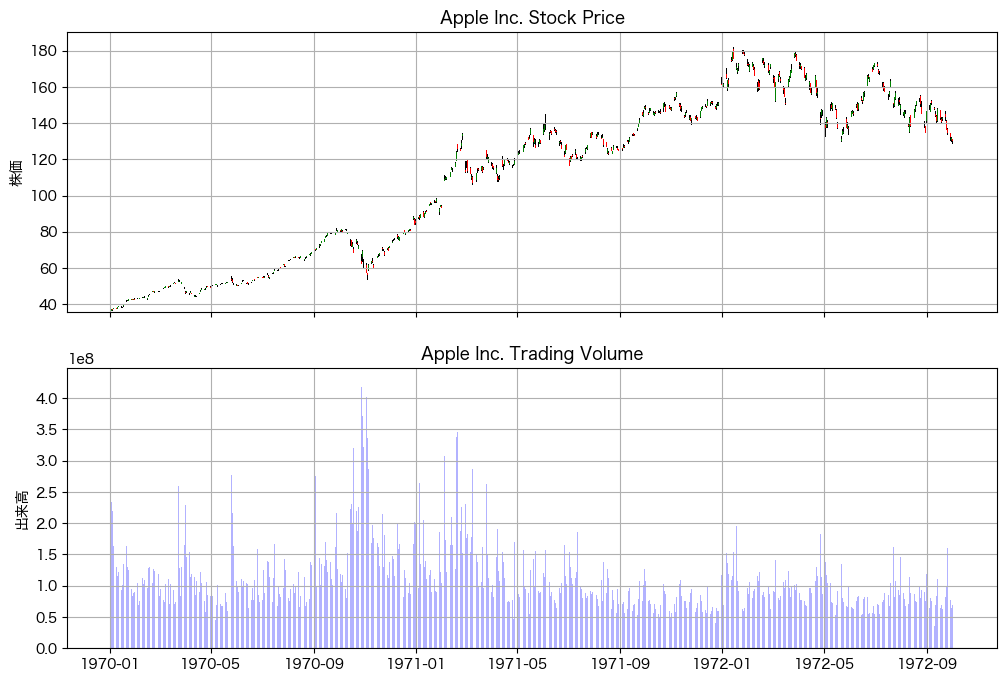

In [6]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Separate graphs for candlestick chart and volume bar chart
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Draw the candlestick chart (Upper Graph)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.grid(True, which='both', axis='both')
colors = df_filtered['Close'] > df_filtered['Open']
ax1.bar(df_filtered.index, df_filtered['High'] - df_filtered['Low'], bottom=df_filtered['Low'], color='black', width=0.6)
ax1.bar(df_filtered.index, df_filtered['Close'] - df_filtered['Open'], bottom=df_filtered['Open'], color=colors.map({True: 'g', False: 'r'}), width=0.6)
ax1.set_title('Apple Inc. Stock Price')
ax1.set_ylabel('株価')

# Draw the volume bar chart (Lower Graph)
ax2.bar(df_filtered.index, df_filtered['Volume'], color='blue', alpha=0.3, width=0.6)
ax2.set_title('Apple Inc. Trading Volume')
ax2.set_ylabel('出来高')
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax2.grid(True, which='both', axis='both')

plt.show()


3. 25日、75日の移動平均を計算して、課題 2. のロウソク足チャートに上書きしてグラフで可視化せよ。

解答例

<img src="figs/3.jpg" width="900px">

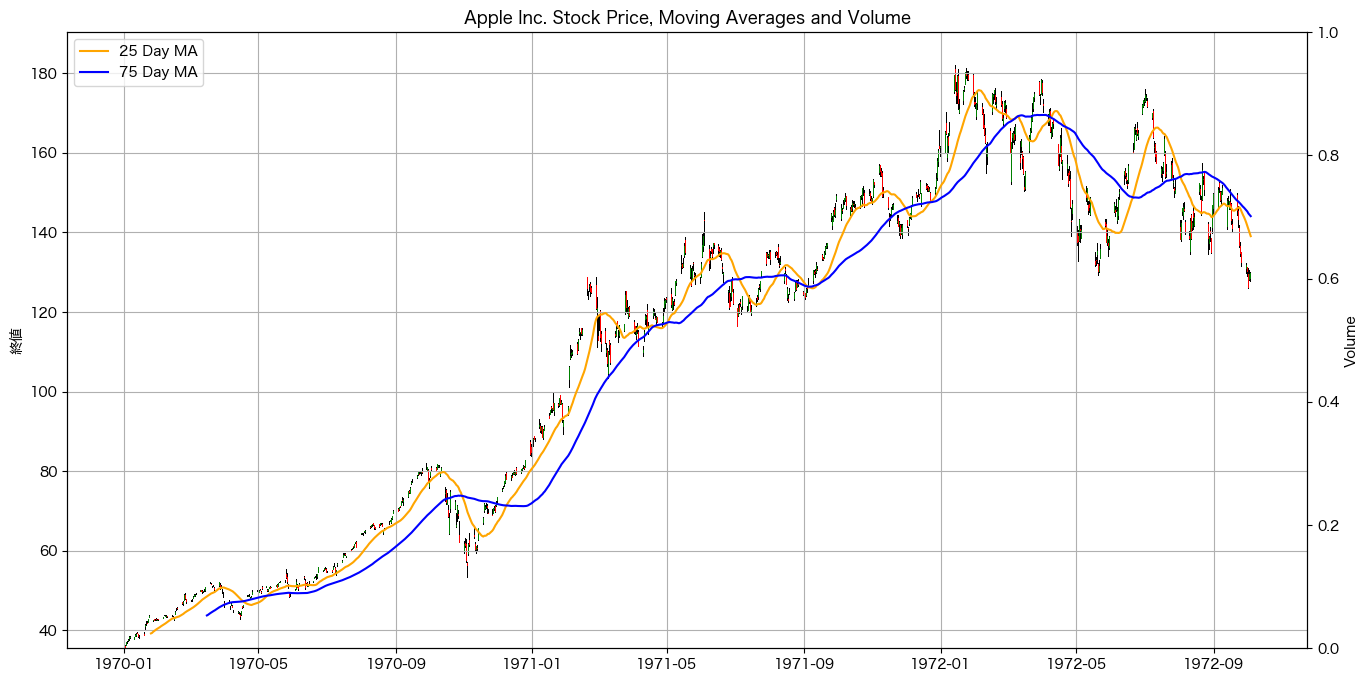

In [14]:
# 25日と75日の移動平均を計算
df_filtered['25d_MA'] = df_filtered['Close'].rolling(window=25).mean()
df_filtered['75d_MA'] = df_filtered['Close'].rolling(window=75).mean()

# グラフの設定
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()

# ロウソク足チャートの描画
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.grid(True, which='both', axis='both')
colors = df_filtered['Close'] > df_filtered['Open']
ax1.bar(df_filtered.index, df_filtered['High'] - df_filtered['Low'], bottom=df_filtered['Low'], color='black', width=0.6)
ax1.bar(df_filtered.index, df_filtered['Close'] - df_filtered['Open'], bottom=df_filtered['Open'], color=colors.map({True: 'g', False: 'r'}), width=0.6)

# 移動平均を描画
ax1.plot(df_filtered.index, df_filtered['25d_MA'], label='25 Day MA', color='orange')
ax1.plot(df_filtered.index, df_filtered['75d_MA'], label='75 Day MA', color='blue')

# 取引量の棒グラフを描画
#ax2.bar(df_filtered.index, df_filtered['Volume'], color='gray', alpha=0.3, width=0.6)
#ax2.set_ylabel('Volume')

# グラフのタイトルとラベル、凡例
ax1.set_title('Apple Inc. Stock Price, Moving Averages and Volume')
ax1.set_ylabel('終値')
ax2.set_ylabel('Volume')
ax1.legend(loc='upper left')

plt.show()


4. 株式トレードの方法として古くから用いられているものとして，単純移動平均を用いた戦略がある。これは短い（例えば25日）の移動平均が，長い（例えば75日）の移動平均より高くなった時に買い，その逆では売るという戦略である。この戦略の妥当性を，グラフで可視化して確かめよ。

解答例

<img src="figs/4.jpg" width="900px">

/var/folders/nv/_5kvc7n52d1_vsr5k29vkw080000gn/T/ipykernel_33231/2248534995.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Signal'][df_filtered['25d_MA'] > df_filtered['75d_MA']] = 1.0  # 25日移動平均が75日移動平均より高い場合は1（買い）
/var/folders/nv/_5kvc7n52d1_vsr5k29vkw080000gn/T/ipykernel_33231/2248534995.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['Signal'][df_filtered['25d_MA'] <= df_filtered['75d_MA']] = -1.0  # 25日移動平均が75日移動平均以下の場合は-1（売り）


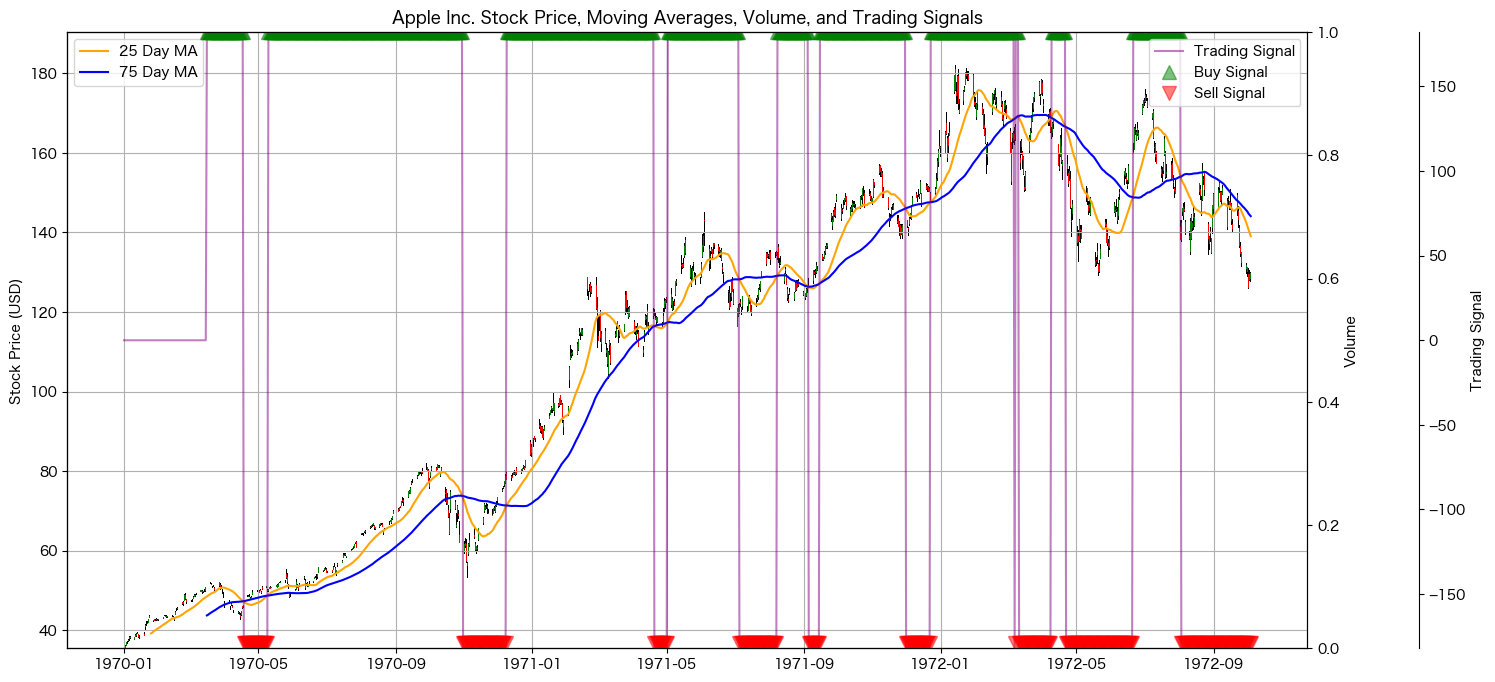

In [15]:
# 移動平均の交差点を検出する新しい列を作成
df_filtered['Signal'] = 0.0  # 初期値は0（何もしない）
df_filtered['Signal'][df_filtered['25d_MA'] > df_filtered['75d_MA']] = 1.0  # 25日移動平均が75日移動平均より高い場合は1（買い）
df_filtered['Signal'][df_filtered['25d_MA'] <= df_filtered['75d_MA']] = -1.0  # 25日移動平均が75日移動平均以下の場合は-1（売り）
# グラフの設定（ロウソク足チャートとシグナルを一つのグラフに表示）
fig, ax1 = plt.subplots(figsize=(16, 8))
ax2 = ax1.twinx()
ax3 = ax1.twinx()

# ロウソク足チャートの描画
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.grid(True, which='both', axis='both')
colors = df_filtered['Close'] > df_filtered['Open']
ax1.bar(df_filtered.index, df_filtered['High'] - df_filtered['Low'], bottom=df_filtered['Low'], color='black', width=0.6)
ax1.bar(df_filtered.index, df_filtered['Close'] - df_filtered['Open'], bottom=df_filtered['Open'], color=colors.map({True: 'g', False: 'r'}), width=0.6)

# 移動平均を描画
ax1.plot(df_filtered.index, df_filtered['25d_MA'], label='25 Day MA', color='orange')
ax1.plot(df_filtered.index, df_filtered['75d_MA'], label='75 Day MA', color='blue')

# 取引量の棒グラフを描画
#ax2.bar(df_filtered.index, df_filtered['Volume'], color='gray', alpha=0.3, width=0.6)
#ax2.set_ylabel('Volume')

# 買い/売りのシグナルを上書きして描画
# y軸の位置を調整してシグナルが見やすくなるようにする
ax3.spines['right'].set_position(('outward', 80))  
buy_signals = df_filtered[df_filtered['Signal'] == 1.0]
sell_signals = df_filtered[df_filtered['Signal'] == -1.0]
ax3.plot(df_filtered.index, df_filtered['Signal'] * df_filtered['Close'].max(), label='Trading Signal', color='purple', alpha=0.5)
ax3.plot(buy_signals.index, buy_signals['Signal'] * buy_signals['Close'].max(), label='Buy Signal', marker='^', color='g', linestyle='None', markersize=10, alpha=0.5)
ax3.plot(sell_signals.index, sell_signals['Signal'] * sell_signals['Close'].max(), label='Sell Signal', marker='v', color='r', linestyle='None', markersize=10, alpha=0.5)
ax3.set_ylim([-df_filtered['Close'].max(), df_filtered['Close'].max()])
ax3.set_ylabel('Trading Signal')

# グラフのタイトルとラベル、凡例
ax1.set_title('Apple Inc. Stock Price, Moving Averages, Volume, and Trading Signals')
ax1.set_ylabel('Stock Price (USD)')
ax2.set_ylabel('Volume')
ax1.legend(loc='upper left')
ax3.legend(loc='upper right')

plt.show()
